In [1]:
# import the libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\marc-\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# import the data
df_path = "dataset_twitter/tweets_clean.parquet"
df = pd.read_parquet(df_path)

df.head(10)

,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,is_retweet
0,2009-04-26 20:05:09,8534.0,7605.0,4838.0,True,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],False
1,2019-10-17 20:12:10,6769.0,1532.0,25483.0,True,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",False
2,2014-11-10 10:50:37,128.0,332.0,924.0,True,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",<NA>,False
3,2019-09-28 16:48:12,625.0,129.0,14.0,True,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",False
4,2016-02-03 13:15:55,1249.0,1472.0,10482.0,True,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],False
5,2010-01-12 07:00:04,742.0,716.0,2444.0,True,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance 📌 Enjoy #Cashbac...,"['Crypto', 'Binance', 'Cashback']",False
6,2019-12-23 16:49:16,131.0,84.0,5728.0,True,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt; #Bitcoin #Crypto #B...,"['Bitcoin', 'Crypto', 'BTC']",False
7,2018-08-03 21:30:08,4052.0,1.0,9.0,True,2021-02-10 23:52:42,🔄 Prices update in $EUR (1 hour): $BTC - 37...,<NA>,False
8,2020-11-26 23:45:46,104.0,41.0,238.0,True,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",False
9,2009-04-26 20:05:09,8534.0,7605.0,4838.0,True,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",False


**VADER**

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [5]:
#function to get the sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

In [6]:
df['sentiment_score'] = df['text'].apply(get_sentiment_score)

In [7]:
df.head(10)

,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,is_retweet,sentiment_score
0,2009-04-26 20:05:09,8534.0,7605.0,4838.0,True,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],False,0.2960
1,2019-10-17 20:12:10,6769.0,1532.0,25483.0,True,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",False,0.4939
2,2014-11-10 10:50:37,128.0,332.0,924.0,True,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",<NA>,False,0.5719
3,2019-09-28 16:48:12,625.0,129.0,14.0,True,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",False,0.3164
4,2016-02-03 13:15:55,1249.0,1472.0,10482.0,True,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],False,0.4019
5,2010-01-12 07:00:04,742.0,716.0,2444.0,True,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance 📌 Enjoy #Cashbac...,"['Crypto', 'Binance', 'Cashback']",False,0.4939
6,2019-12-23 16:49:16,131.0,84.0,5728.0,True,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt; #Bitcoin #Crypto #B...,"['Bitcoin', 'Crypto', 'BTC']",False,0.0000
7,2018-08-03 21:30:08,4052.0,1.0,9.0,True,2021-02-10 23:52:42,🔄 Prices update in $EUR (1 hour): $BTC - 37...,<NA>,False,-0.2023
8,2020-11-26 23:45:46,104.0,41.0,238.0,True,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",False,0.0000
9,2009-04-26 20:05:09,8534.0,7605.0,4838.0,True,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",False,0.0000


In [8]:
# create a function get the sentiment text
def getSentiment(score):
    if score <= 0.05:
        return "negative"
    elif -0.05 < score < 0.05:
        return "neutral"
    else:
        return "positive"

In [9]:
# create a column to store the text sentiment
df['Sentiment'] = df['sentiment_score'].apply(getSentiment)
# show the data
df.head(10)

,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,is_retweet,sentiment_score,Sentiment
0,2009-04-26 20:05:09,8534.0,7605.0,4838.0,True,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],False,0.2960,positive
1,2019-10-17 20:12:10,6769.0,1532.0,25483.0,True,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",False,0.4939,positive
2,2014-11-10 10:50:37,128.0,332.0,924.0,True,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",<NA>,False,0.5719,positive
3,2019-09-28 16:48:12,625.0,129.0,14.0,True,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",False,0.3164,positive
4,2016-02-03 13:15:55,1249.0,1472.0,10482.0,True,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],False,0.4019,positive
5,2010-01-12 07:00:04,742.0,716.0,2444.0,True,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance 📌 Enjoy #Cashbac...,"['Crypto', 'Binance', 'Cashback']",False,0.4939,positive
6,2019-12-23 16:49:16,131.0,84.0,5728.0,True,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt; #Bitcoin #Crypto #B...,"['Bitcoin', 'Crypto', 'BTC']",False,0.0000,negative
7,2018-08-03 21:30:08,4052.0,1.0,9.0,True,2021-02-10 23:52:42,🔄 Prices update in $EUR (1 hour): $BTC - 37...,<NA>,False,-0.2023,negative
8,2020-11-26 23:45:46,104.0,41.0,238.0,True,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",False,0.0000,negative
9,2009-04-26 20:05:09,8534.0,7605.0,4838.0,True,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",False,0.0000,negative


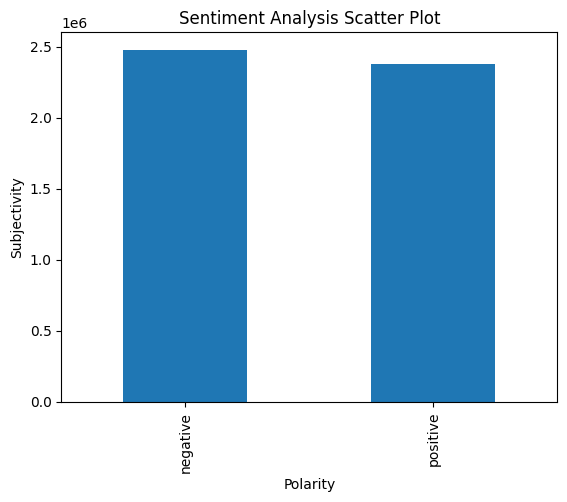

In [10]:
# create a bar chart to show the cout of Positive, Neutral and Negative sentiments
df['Sentiment'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [11]:
# Save the updated DataFrame back to a Parquet file
df.to_parquet('dataset_twitter/tweets_with_sentiment.parquet')